#**Assessment 2**
**Instructions**




1.   Set up your notebook
2.   Load the data
3.   Data cleaning
4.   Data exploration
5.   Conclusions


---









##**1. Set Up Your Notebook**


*   Create a new Jupyter notebook and title it “Housing Prices Data Exploration.”
*   Import the necessary Python libraries (`pandas`, `numpy`, `matplotlib`, `seaborn`).




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



---


##**2. Load the Data**


*   Use “pandas” to load the California housing prices dataset from [Assessment 2: California Census Data](https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv).
*   Display the first few rows of the dataset to ensure it is loaded correctly.

In [2]:
# Loading the dataset by storing it to a variable
dataset = pd.read_csv('/content/sample_data/california_housing_test.csv')

# Checking the first 5 rows of the data to confirm the headers and data loaded
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0


---
##**3. Data Cleaning**


*   Identify any missing values in the dataset. Use appropriate methods to handle them (e.g., imputation with the mean or median, or removal).
*   Check for duplicate entries and remove them if necessary.
*   Detect and correct any anomalies or outliers in the data, considering methods like IQR (interquartile range) or Z-scores.

In [3]:
# First I will check for any missing values in the dataset
# This will return each of the column headers with a count of how many mising values are in each column

dataset.isnull().sum()

# Currently 0 missing values so there is no need to impute any values for any of the columns

# Next, I will drop any duplicate data from the data set
dataset = dataset.drop_duplicates()

# Next, I will establish quartiles to help identify any outliers in the median_income
Quartile_1 = dataset['median_income'].quantile(0.25)
Quartile_3 = dataset['median_income'].quantile(0.75)
IQR = Quartile_3 - Quartile_1

# Finally, I can define the outliers by checking of the median income is less than the lowerbound or greater than the upperbound
# This will now identify the outliers which can be used as a filter in the dataset to ensure they are not in it
outliers = dataset[(dataset['median_income'] < (Quartile_1 - 1.5 * IQR)) | (dataset['median_income'] > (Quartile_3 + 1.5 * IQR))]
# Applying the filter to the dataset, removing the outliers
dataset = dataset[~dataset.index.isin(outliers.index)]



---
##**4. Data Exploration**


*   Generate summary statistics for the dataset to understand the distribution of data (use .describe()).
*   Create visualizations to help understand the data better:
  *   Histograms or box plots for distribution of numerical features.
  *   Bar charts for categorical features.
  *   Scatter plots to observe relationships between features, especially how other variables relate to the housing prices.
  *   Use correlation matrices and heatmaps to find potential relationships between features.

In [4]:
# The describe function is from the pandas library that will allow an easy way to generate descriptive statistics from the dataset
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000,2905.000000
mean,-119.588640,35.648368,28.885370,2571.035800,531.930465,1406.726334,491.143201,3.604613,197587.355250
std,1.995766,2.138387,12.538959,2136.709685,417.643665,1033.679623,366.523814,1.452178,104540.692081
min,-124.180000,32.560000,1.000000,6.000000,2.000000,5.000000,2.000000,0.499900,22500.000000
25%,-121.800000,33.930000,19.000000,1387.000000,292.000000,782.000000,275.000000,2.526300,118800.000000
50%,-118.500000,34.280000,29.000000,2090.000000,438.000000,1162.000000,412.000000,3.421900,174100.000000
75%,-118.020000,37.700000,37.000000,3100.000000,637.000000,1745.000000,599.000000,4.513500,252000.000000
max,-114.490000,41.920000,52.000000,30450.000000,5419.000000,11935.000000,4930.000000,7.816400,500001.000000


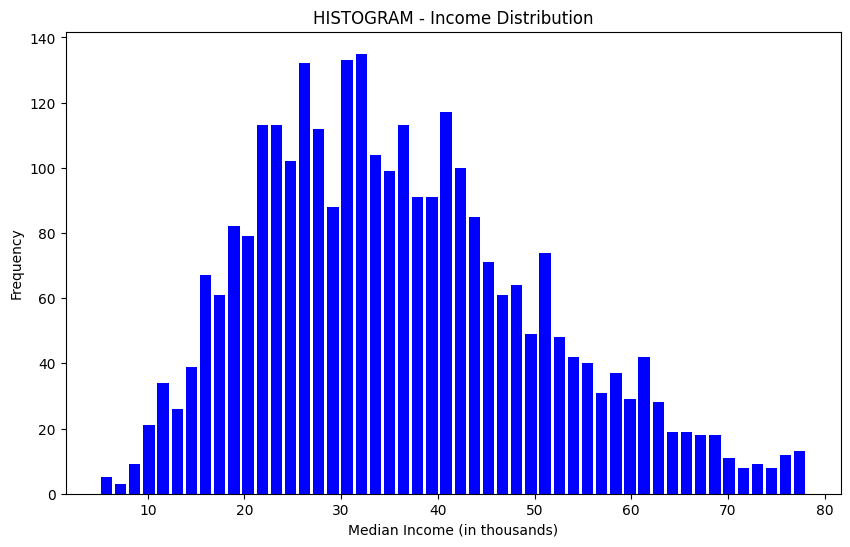

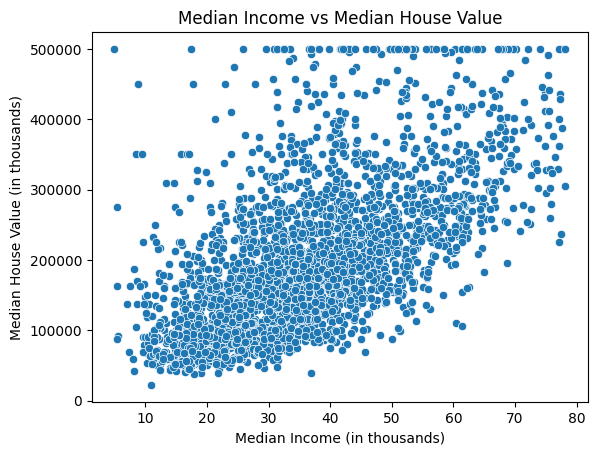

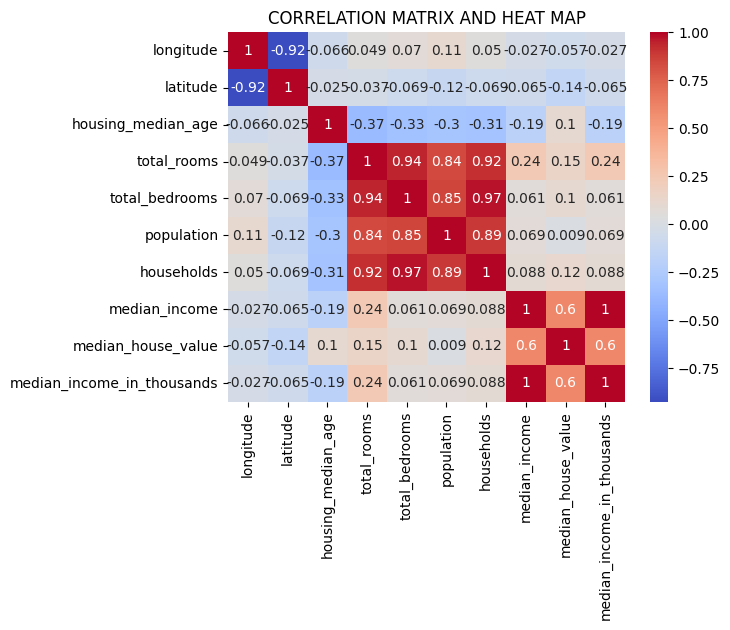

In [5]:
# For the visualization, I will generate a Histogram, Bar Chart, Scatter Plot, and Correlation Matrix and Heat Map

# HISTOGRAM
dataset['median_income_in_thousands'] = dataset['median_income'] * 10
dataset['median_income_in_thousands'].plot(kind='hist', bins = 50, figsize = (10, 6), color='blue', rwidth = 0.8)
plt.title('HISTOGRAM - Income Distribution')
plt.xlabel("Median Income (in thousands)")
plt.show()

# BAR CHART There is no categorical data in the test.csv or train.csv
# However, if I use the actual dataset.csv, I would barchart in this manner
# To view the barchart, change the file_path to '/content/sample_data/CSCFPX4030_PrallDarien_Assessment2_Attempt1_California_Census_Data.csv'
# Uncomment the below information, reset and run all

#dataset['ocean_proximity'].value_counts().plot(kind = 'bar', figsize = (10, 6), color = 'green')
#plt.title('BAR CHART - Ocean Proximity Distribution')
#plt.xlabel("Ocean Proximity Type")
#plt.ylabel("Frequency")
#plt.show()

# SCATTER PLOT
sns.scatterplot(x ='median_income_in_thousands', y = 'median_house_value', data = dataset)
plt.title("Median Income vs Median House Value")
plt.xlabel("Median Income (in thousands)")
plt.ylabel("Median House Value (in thousands)")
plt.show()

# CORRELATION MATRIX AND HEAT MAP
corr_matrix = dataset.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title("CORRELATION MATRIX AND HEAT MAP")
plt.show()

---
##**5. Conclusion**


*   Will be provided in a seperate document.